### The main aim is to visualize the best fit line for the Linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston      # for loading dataset
from sklearn.model_selection import train_test_split   # for splitting data to train and test
from sklearn.linear_model import LinearRegression     # for building model
from sklearn.metrics import r2_score      # for checking acc
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# loading the boston dataset

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = pd.Series(boston.target) * 1000
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0


#### As we are considering a Simple Linear regression we are considering only one independent variable

In [12]:
# Taking only 1 independent variable

DIS = df['DIS']
MEDV = df['MEDV']

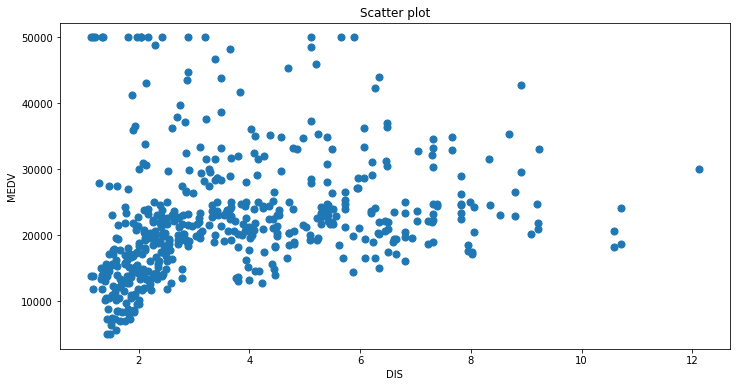

In [22]:
plt.figure(figsize=(12,6))
plt.scatter(DIS,MEDV, s=50)
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.title('Scatter plot')
plt.show()

In [14]:
x = np.array(DIS).reshape(-1,1)
y = np.array(MEDV)

In [15]:
# splitting data to train and test

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
# model building

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

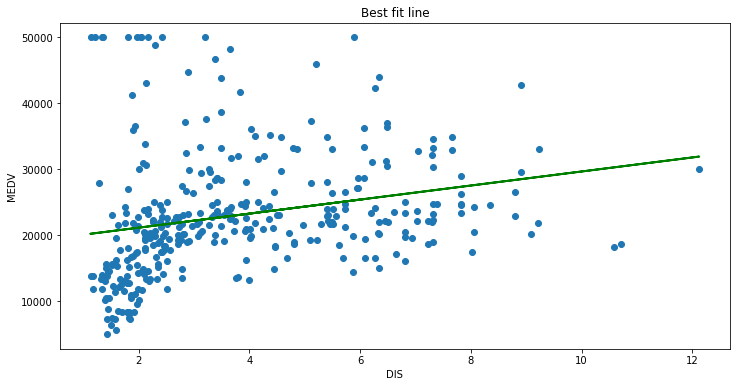

In [31]:
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='green', linewidth=2)
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.title('Best fit line')
plt.show()

### the green color line is the best fit line although it has more errors our main aim is to plot the best fit line

In [24]:
# values for equation y = mx+b

m = model.intercept_
b = model.coef_

print('The slope m of the equaion y = mx+b is {}'.format(m))
print('The coefficient b of the equaion y = mx+b is {}'.format(b))

The slope m of the equaion y = mx+b is 19002.57959281851
The coefficient b of the equaion y = mx+b is [1065.68610744]


In [25]:
# checking training score
model.score(X_train,y_train)

0.058236846819807675

In [26]:
# predicting for test data

predictions = model.predict(X_test)
predictions

array([21822.70473894, 23348.02126453, 20993.38781013, 24637.1817487 ,
       21526.33743246, 23320.9528374 , 23263.83206204, 20720.35902941,
       22305.46054562, 21664.87662643, 22081.66646305, 26027.68898169,
       20769.70029618, 24346.03630415, 24033.79027467, 21701.85593436,
       21140.66563018, 20696.4876606 , 25022.0010021 , 21412.73529341,
       23722.50336268, 23414.83978346, 23513.62888562, 21643.98917873,
       21000.31476983, 21591.98369668, 23800.93786019, 21662.63868561,
       23134.35119998, 22085.28979582, 21769.20729635, 23841.22079505,
       20405.34221605, 21244.35688843, 21709.74201156, 20732.40128242,
       24295.9490571 , 24577.29018946, 23520.23613949, 24637.1817487 ,
       21985.00873311, 22394.33876698, 24456.76109071, 25927.40791898,
       22298.00074286, 21055.62387881, 23038.54601893, 24637.1817487 ,
       22235.23183113, 23361.23577226, 25638.28727803, 24591.78352052,
       23240.70667351, 22046.28568429, 22063.23009339, 23256.4788279 ,
      

In [27]:
# checking acc using r2_score

r2_score(y_test, predictions)

0.039379591033903094

### Plotting best fit line of test_data

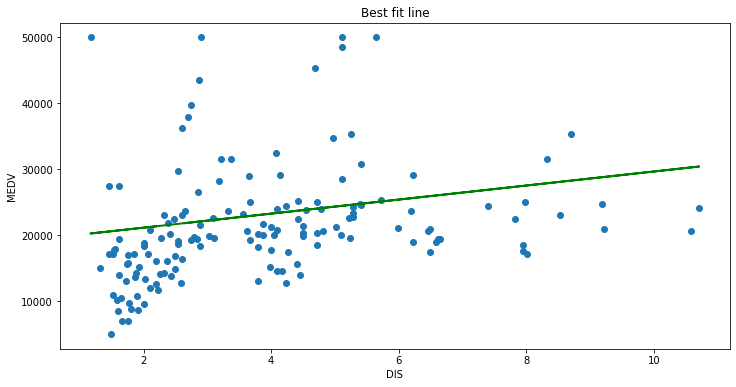

In [30]:
plt.figure(figsize=(12,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='green', linewidth=2)
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.title('Best fit line')
plt.show()